In [5]:
import requests
import json

In [1]:
import os
os.getcwd()

'd:\\workSpace\\virtual_coin'

In [2]:
os.mkdir('statics/btc_jpy/2019/test.csv')

FileNotFoundError: [WinError 3] 指定されたパスが見つかりません。: 'statics/btc_jpy/2019/test.csv'

In [11]:
base_url = 'https://coincheck.com/'
ticker_url = base_url + 'api/ticker'
books_url = base_url + 'api/order_books'
trade_url = base_url + 'api/trades'
rate_url = base_url + 'api/exchange/orders/rate'

In [14]:
rate_data = requests.get(rate_url, params={'pair':'btc_jpy', 'limit':100}).json()

In [15]:
rate_data

{'success': False, 'error': 'order_type, pair are required'}

In [40]:
books = requests.get(books_url).json()

In [49]:
books['bids'][0]

['5621024.0', '0.0089']

In [19]:
trades = requests.get(trade_url, params={"pair":"btc_jpy", 'limit':150}).json()

In [22]:
prices = []
for dict in trades['data']:


[{'id': 208494544,
  'amount': '0.016',
  'rate': '5451044.0',
  'pair': 'btc_jpy',
  'order_type': 'buy',
  'created_at': '2022-01-02T03:55:27.000Z'},
 {'id': 208494543,
  'amount': '0.03595964',
  'rate': '5450554.0',
  'pair': 'btc_jpy',
  'order_type': 'buy',
  'created_at': '2022-01-02T03:55:27.000Z'},
 {'id': 208494542,
  'amount': '0.00348855',
  'rate': '5449000.0',
  'pair': 'btc_jpy',
  'order_type': 'buy',
  'created_at': '2022-01-02T03:55:20.000Z'},
 {'id': 208494541,
  'amount': '0.05',
  'rate': '5449000.0',
  'pair': 'btc_jpy',
  'order_type': 'sell',
  'created_at': '2022-01-02T03:55:18.000Z'},
 {'id': 208494540,
  'amount': '0.05322124',
  'rate': '5449319.0',
  'pair': 'btc_jpy',
  'order_type': 'sell',
  'created_at': '2022-01-02T03:54:55.000Z'},
 {'id': 208494539,
  'amount': '0.01',
  'rate': '5449319.0',
  'pair': 'btc_jpy',
  'order_type': 'sell',
  'created_at': '2022-01-02T03:54:49.000Z'},
 {'id': 208494538,
  'amount': '0.03',
  'rate': '5450834.0',
  'pair': 

In [6]:
rates = request.get('https://coincheck.com/ja/exchange/rates/',params={'pair':'btc_jpy', 'time':'2021-12-30T09:20:00:000Z'})
rates_dict = ast.literal_eval(rates.text)
print(rates_dict['time'], rates_dict['rate'])
#時差はutc+9と変換

2021-12-30T09:20:00.000Z 5400809.0


In [5]:
import ast

In [29]:
from matplotlib import pyplot as plt

In [25]:
import pandas as pd

In [114]:
rate_decem = pd.read_csv('statics/btc_jpy/2021/12_month.csv')

In [162]:
y = rate_decem.loc[288*7:288*8, 'rate']
x = rate_decem.loc[288*7:288*8, 'utc_timestamp']

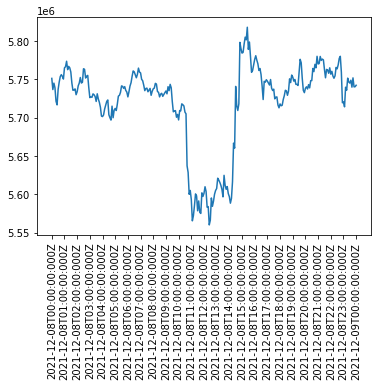

In [163]:
plt.plot(x,y)
ticks=12
plt.xticks(range(0, len(x), ticks), x[::ticks], rotation=90)
plt.show()

In [54]:
y_delta = np.ones(y.size + 1)
y_delta[1:] = np.array(y)
y_delta = (np.append(np.array(y),0) - y_delta)/y_delta

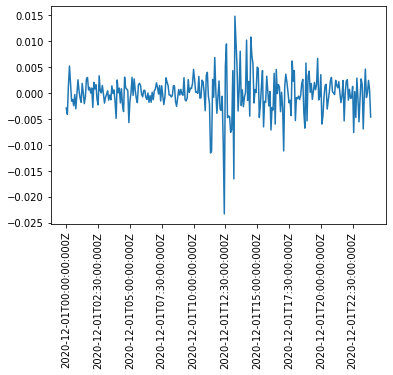

In [55]:
plt.plot(x[1:],y_delta[1:289])
ticks=30
plt.xticks(range(0, len(x), ticks), x[::ticks], rotation=90)
plt.show()

In [39]:
import numpy as np

In [49]:
#時系列データの幅を見て、階差を取っていった時の最大最小を標準化して返す。
#nは窓幅。とりあえず24(２時間)で実験
def delta_ret_risk(data, n_window):
    data_len = len(data)
    out_size = data_len-n_window
    out_ret_risk_list = np.zeros([out_size, 2])
    y = np.array(data)

    for i in range(out_size):
        y_window = y[i+1:n_window+i]
        y_window_sd = (y_window-y[i])/y[i]
        ret_max = np.nanmax(y_window_sd)
        risk_max = np.nanmin(y_window_sd)
        out_ret_risk_list[i] = np.array([ret_max, risk_max])

    return out_ret_risk_list

In [51]:
return_risk = delta_ret_risk(data, n_window=24)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('statics/train/datasets.csv')

array([1, 2])

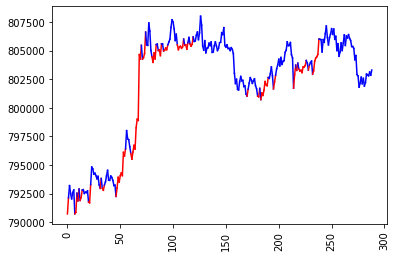

In [79]:
start=1100
draw_len = 288
x = np.arange(draw_len+2)

for i in range(draw_len):
    plt.plot(x[i:i+2], np.array(data['rate'][i+start:i+start+2]), color= 'red' if (data['ret_max'][i+start]>0.003 and data['risk_max'][i+start]>-0.001) else 'blue')
    plt.xticks(rotation=90)
plt.show()

#abs(return_risk[i][0])>abs(return_risk[i][1])

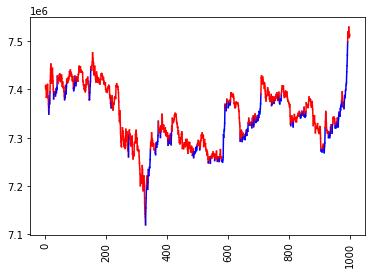

In [134]:
start=196000
draw_len = 1000
x = np.arange(draw_len+2)

for i in range(draw_len):
    plt.plot(x[i:i+2], np.array(data['rate'][i+start:i+start+2]), color= 'blue' if data['ret_max'][i+start]>0.003
                                                                                and data['risk_max'][i+start]>-0.001 else 'red')
    plt.xticks(rotation=90)
plt.show()


In [171]:
rate_novem = pd.read_csv(btc_url+'2020/11_month.csv')
rate_decem = pd.read_csv(btc_url+'2021/12_month.csv')

In [183]:
for year in [2020, 2021]:
    for day in range(1, 13):
        csv_path = btc_url+str(year)+'/'+str(day)+'_month.csv'
        df_temp = pd.read_csv(csv_path)
        if year==2020 and day==1:
            df_rates = df_temp
        else:
            df_rates = pd.concat([df_rates, df_temp])

df_rates.to_csv('statics/train/rates.csv', index=False)
        


In [222]:
data = pd.read_csv('statics/train/rates.csv')

In [227]:
data.loc[:,'rate']

779637.0

In [210]:
rate_ret_risk = delta_ret_risk(data['rate'], n_window=24)

In [215]:
ret_max = np.pad(rate_ret_risk[:,0], [0,24], 'constant')
risk_max = np.pad(rate_ret_risk[:, 1], [0, 24], 'constant')

In [216]:
data['ret_max'] = ret_max

In [219]:
data['risk_max'] = risk_max

In [221]:
data.to_csv('statics/train/datasets.csv')

In [4]:
import torch
import numpy as np
import pandas as pd

In [129]:
class RateDataset(torch.utils.data.Dataset):
    #past_numは過去何点で予測するか。predict_numはその先何点からret_max, risk_maxを算出するか
    def __init__(self, csv_path, past_num, predict_num, n_window, train_prop, batch_size, model_mode='num_predict', transform=None):
        self.rate_data = np.array(pd.read_csv(csv_path).loc[:, 'rate'])
        self.data_num = self.rate_data.shape[0]
        self.past_num = past_num
        self.predict_num = predict_num
        self.n_window = n_window
        self.train_prop = train_prop
        self.batch_size = batch_size
        self.model_mode = model_mode
        self.transform = transform

        self.len = self.data_num-self.past_num-self.predict_num+1
        

        dataset = []
        for idx in range(self.data_num-self.past_num-self.predict_num+1):
            #データセット作るのに必要な範囲をまとめて抽出（ある地点からpast_num遡ったデータ群と、ret,riskのために必要な先のデータ群)
            rate_data = self.rate_data[idx : idx+self.past_num+self.predict_num]
            

            #StandardizeとLog_scale２つを特徴量にしてみたかった。
            if self.transform:
                inputs = np.zeros([self.past_num+self.predict_num, len(self.transform)])

                for i, transform in enumerate(self.transform):
                #この時点でrate_dataがself.rate_dataから抽出したものであることによるindexの違いに注意
                    rate_data_temp = transform(rate_data, self.past_num-1, self.n_window)
                    inputs[:rate_data_temp.shape[0], i] = rate_data_temp
            
            rate_train = inputs[ : self.past_num, :]
            #インデックスの終点を書いているのは、念のため24点から計算していることを保証したいから。（範囲外ならエラーくるはず）
            #この指標はStandardizeがもとで、原則transformにはStandardizeから書くようにして、0列目がStandardizeのデータになるようにする前提

            ret_risk_label = [np.nanmax(inputs[self.past_num : self.past_num+self.predict_num, 0]), np.nanmin(inputs[self.past_num : self.past_num+self.predict_num, 0])]

            if self.model_mode == 'label_predict':
                if ret_risk_label[0] >= 0.5 and ret_risk_label[1] >= -0.1:
                    ret_risk_label = [1.0, 0.0]
                else:
                    ret_risk_label = [0.0, 1.0]
            
            dataset.append((torch.tensor(rate_train), torch.tensor(ret_risk_label)))
        
        self.dataset = dataset
    
    #こうしとけばデータの範囲があらかじめ指定できるはず
    def __len__(self):
        return (self.len)
    
    def __getitem__(self, idx):
        #データセット作るのに必要な範囲をまとめて抽出（ある地点からpast_num遡ったデータ群と、ret,riskのために必要な先のデータ群)
        return self.dataset[idx]
    
    def makeBatch(self):
        train_size = int(self.len*self.train_prop)
        indices = np.arange(len(self))
        #train_set, test_set = torch.utils.data.random_split(self, [train_size, test_size])

        #ある地点より過去のデータのみで学習し、testはその後のデータを用いてやるために、ランダムにはしない
        train_set = torch.utils.data.Subset(self.dataset, indices[:train_size])
        test_set = torch.utils.data.Subset(self.dataset, indices[train_size:])
        
        if self.model_mode == 'label_predict':
            labels = [label.numpy()[0] for _,label in train_set]
            major_idxs = np.where(labels == np.float32(0))[0]
            minor_idxs = np.where(labels == np.float32(1))[0]

            major_set = torch.utils.data.Subset(train_set, major_idxs)
            monor_set = torch.utils.data.Sub
            
            #これでバッチサイズの半分をラベル０の方にしている。この後minor_setからもう半分選ぶ
            train_major_loader = torch.utils.data.DataLoader(major_set, self.batch_size//2, shuffle=True)

        #if self.model_mode == 'label_predict':

        train_dataloader = torch.utils.data.DataLoader(train_set, self.batch_size, shuffle=True)
        test_dataloader = torch.utils.data.DataLoader(test_set, self.batch_size, shuffle=False)

        return train_dataloader, test_dataloader
    
    def get_datasize(self):
        train_size = int(self.len*self.train_prop)
        test_size = self.len - train_size

        return train_size, test_size

#なんとなく親クラスとして作ってみた。最大最小正規化を外側に書きたくなかっただけ。
class Transform(object):
    def __init__(self):
        pass
    
    def __call__(self, rate_data, sd_idx, n_window):
        pass
    
    def std_max_min(self, array):
        max = np.nanmax(array)
        min = np.nanmin(array)
        return (array - min) / (max - min)

#利益率
class Standardize(Transform):
    def __init__(self):
        super().__init__()
    
    #rate_dataのどのインデックス要素を使って標準化するか
    def __call__(self, rate_data, sd_idx, n_window):
        rate = copy.deepcopy(rate_data)
        rate[sd_idx+1 : ] = (rate_data[sd_idx+1 : ] - rate_data[sd_idx])*100 / rate_data[sd_idx]
        rate[: sd_idx+1] = super().std_max_min(rate[: sd_idx+1])
        return rate

In [130]:
data_set = RateDataset('statics/train/datasets.csv', past_num=576, predict_num=24, train_prop=0.7, batch_size=128, n_window=7, model_mode='label_predict', transform=[Standardize()])

In [131]:
train_dataloader, test_dataloader = data_set.makeBatch()

In [172]:
data = data_set.dataset

In [194]:
data_set

In [159]:
batch = next(iter(train_dataloader))

In [183]:
labels = [label.numpy()[0] for _,label in train_set]
major_idxs = np.where(labels == np.float32(0))[0]
minor_idxs = np.where(labels == np.float32(1))[0]

major_set = torch.utils.data.Subset(train_set, major_idxs)
minor_set = torch.utils.data.Subset(train_set, minor_idxs)

In [271]:
class Balanced_dataloader:
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.features = np.array([feature.numpy() for feature, _ in self.dataset])
        self.labels = np.array([label.numpy() for _,label in self.dataset])

        labels = [label.numpy()[0] for _,label in self.dataset]
        self.major_idxs = np.where(labels == np.float32(0))[0]
        self.minor_idxs = np.where(labels == np.float32(1))[0]
        
        np.random.shuffle(self.major_idxs)
        np.random.shuffle(self.minor_idxs)

        self.batch_size = batch_size

        self.used_idx = 0
        self.count = 0
    
    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < len(self.dataset):
            idxs = self.major_idxs[self.used_idx : self.used_idx + self.batch_size//2].tolist()\
                   + np.random.choice(self.minor_idxs, self.batch_size//2, replace=False).tolist()
            
            yield [torch.tensor(self.features[idxs]), torch.tensor(self.labels[idxs])]

            self.used_idx += self.batch_size//2
            self.count += self.batch_size
        

In [280]:
test_iter = Balanced_dataloader(data, 128)

In [1]:
import numpy as np

In [4]:
l = [1,2,3,4,5,6,7,8]
torch.manual_seed{0}
np.random.choice(l,4)

array([6, 4, 5, 1])

In [568]:
train_size = int(len(data_set)*0.7)
test_size = len(data_set) - train_size
train_set, test_set = torch.utils.data.random_split(data_set, [train_size, test_size])

In [456]:
net,_ = rnn(x) 

In [458]:
net = linear(net[-1, :, :])

In [443]:
test_data = torch.tensor(test_set[0][0]).float()

C:\Users\sator\AppData\Local\Temp/ipykernel_8560/891155682.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = torch.tensor(test_set[0][0]).float()


In [585]:
torch.tensor([rate_ret_risk[0], rate_ret_risk[1]])

tensor([[ 0.0032, -0.0020],
        [ 0.0047, -0.0005]], dtype=torch.float64)

In [455]:
x=x.float()

In [406]:
train, test = data_set.makeBatch()

In [411]:
batch = next(iter(train_dataloader))


In [418]:
x, t = batch

In [421]:
x.size()

torch.Size([32, 576])

In [422]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device：", device)

device： cuda


In [426]:
x = x[:,:,None].to(device)

In [5]:
import torch.nn as nn
import torch

In [6]:
class LSTMNet(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, batch_first=True):
        super(LSTMNet, self).__init__()
        self.rnn = nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            batch_first = batch_first)
        self.output_layer = nn.Linear(hidden_size, output_size)

        nn.init.xavier_normal_(self.rnn.weight_ih_l0)
        nn.init.orthogonal_(self.rnn.weight_hh_l0)

    def forward(self, inputs):
        h, _= self.rnn(inputs)
        output = self.output_layer(h[:, -1, :])

        return output


In [8]:
model = LSTMNet(1,2,3)

In [13]:
model.train()

LSTMNet(
  (rnn): LSTM(1, 3, batch_first=True)
  (output_layer): Linear(in_features=3, out_features=2, bias=True)
)

In [44]:
def te():
    if 1==2:
        return 0
    
    elif True:
        return 1
    
    return 2

In [19]:
a = torch.tensor([1,0, 0,0, 1, 1, 0])
b = torch.tensor([1,1,0,1,0,1,0])

In [45]:
te()

1

In [43]:
a

[2, [4, 3]]

In [42]:
torch.tensor([a])

TypeError: an integer is required (got type list)

In [29]:
model = LSTMNet(input_size=1, hidden_size=3, output_size=2, dropout=0.2).to(device)

In [30]:
model.load_state_dict(torch.load('LSTM_model/models/model.pth'))

<All keys matched successfully>

In [37]:
ittrain = iter(train)
ittest = iter(test)

In [40]:
trainx, traint = next(ittrain)
testx, testt = next(ittest)
trainx = trainx.float().to(device)
testx = testx.float().to(device)

In [41]:
model.eval()
ytrain = model(trainx)
ytest = model(testx)

In [85]:
l = np.array([1,3,2,4,3,5,4,6,5,7,6,8])
np.diff(l)

array([ 2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2])

In [80]:
datalog = data_set[0][0].to('cpu').detach().numpy()

In [71]:
import matplotlib.pyplot as plt

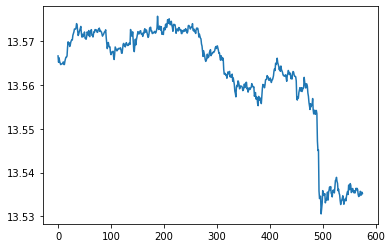

In [118]:
log_sub = np.diff(datalog, axis=0, prepend=datalog[0][0])
plt.plot(datalog)

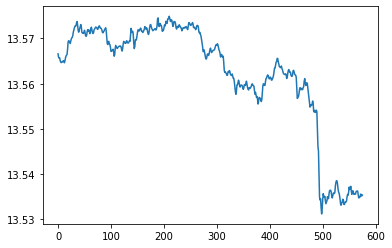

In [157]:
log_1d = datalog-0.5*log_sub
plt.plot(log_1d)

In [148]:
log_sub_2d = np.diff(log_1d, axis=0, prepend=log_1d[0][0])

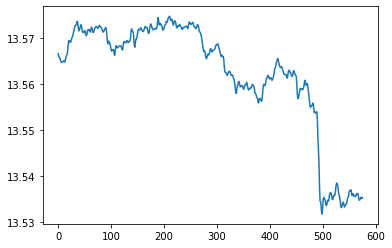

In [149]:
log_2d = log_1d-0.5*log_sub_2d
plt.plot(log_2d)

In [158]:
def trend(data_log, n):
    data = copy.deepcopy(data_log)
    for i in range(n):
        log_sub = np.diff(data, axis=0, prepend=data[0][0])
        data = data - 0.5*log_sub
    
    plt.plot(data)
    

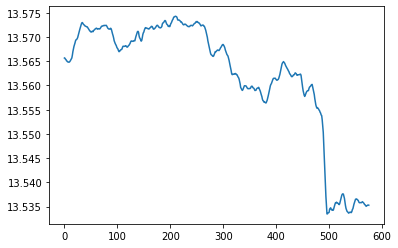

In [203]:
moving_average = np.pad(datalog[:,0], 3, 'reflect')
average = np.convolve(moving_average, np.ones(7), mode='valid')/7
plt.plot(average)


In [206]:
import torch.nn.functional as F

In [2]:
data_set[0]

NameError: name 'data_set' is not defined

In [236]:
torch.max(traint.data, 1)[1]

tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1])

In [232]:
traint[:,0] = 0.0

In [240]:
acctensor = traint == traint

In [243]:
torch.sum(acctensor[:,0], axis=0)

tensor(128)